In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Comparaison entre spectre théorique et mesuré

In [254]:
# Constants
h = 6.62607015e-34  # Planck constant in J*s
c = 299792458  # Speed of light in m/s
kB = 1.380649e-23  # Boltzmann constant in J/K

I = 8.21


In [255]:
# Charger les données courant/température
courant_temperature_df = pd.read_csv('data/regression_courant_temperature.txt', delimiter=';')

print(courant_temperature_df)

courant = 8.21
T = courant_temperature_df.loc[courant_temperature_df['Courant (A)'] == courant, 'Température (K)'].values[0]

print(T)

   Courant (A)  Température (K)
0         6.62          1344.29
1         7.01          1425.25
2         7.41          1501.30
3         7.79          1599.72
4         8.21          1683.15
5         8.22          1667.59
6         8.61          1745.65
1683.15


In [256]:
# Lire les trois fichiers de données qu'on a pour le I donné, et faire une moyenne
nb_mesures = 3

# Initialize an empty DataFrame for the measurements
df = pd.DataFrame()

# Loop over the three files
for i in range(1, nb_mesures + 1):
    # Read the data from the file
    df_temp = pd.read_csv(f'data/Courant8210mAMesure{i}.txt', delimiter=';', names=['wavelength (nm)', f'measure {i}'])
    
    # If it's the first file, keep the lambda column
    if i == 1:
        df['wavelength (nm)'] = df_temp['wavelength (nm)']
    
    # Add the luminance to the DataFrame
    df[f'measure {i}'] = df_temp[f'measure {i}']

# Calculate the average of the three measures
df['average luminous intensity (arb. unit)'] = df.iloc[:, 1:].mean(axis=1)

print(df)

      wavelength (nm)  measure 1  measure 2  measure 3  \
0          195.637939   0.000617  -0.000008  -0.000130   
1          195.838028  -0.000202  -0.000483   0.000313   
2          196.038132   0.001108   0.000647   0.000542   
3          196.238266  -0.000415  -0.000483  -0.000703   
4          196.438415   0.001845   0.001564   0.000296   
...               ...        ...        ...        ...   
3643      1017.944946   0.003090   0.002023   0.001312   
3644      1018.188232  -0.000136  -0.000483  -0.000932   
3645      1018.431580   0.000650   0.000106   0.000165   
3646      1018.674866  -0.000300  -0.000401  -0.000375   
3647      1018.918213   0.000928   0.001122   0.000001   

      average luminous intensity (arb. unit)  
0                                   0.000160  
1                                  -0.000124  
2                                   0.000766  
3                                  -0.000534  
4                                   0.001235  
...                  

In [257]:
# Convert wavelength to meters
df['wavelength (m)'] = df['wavelength (nm)'] * 1e-9  # Assuming wavelength is in nanometers, convert to meters

# For theoretical plotting of Planck's law
lambda_min = 1e-9  # Minimum wavelength in meters
lambda_max = 1e-5  # Maximum wavelength in meters
nb_lambdas = 1000  # Number of wavelengths for the theoretical sample

<ipython-input-258-f8ed47396961>:9: RuntimeWarning: overflow encountered in exp
  sample_theoretical_luminous_intensity = (2 * h * c**2) / (sample_wavelengths**5 * (np.exp((h * c) / (sample_wavelengths * kB * T)) - 1))


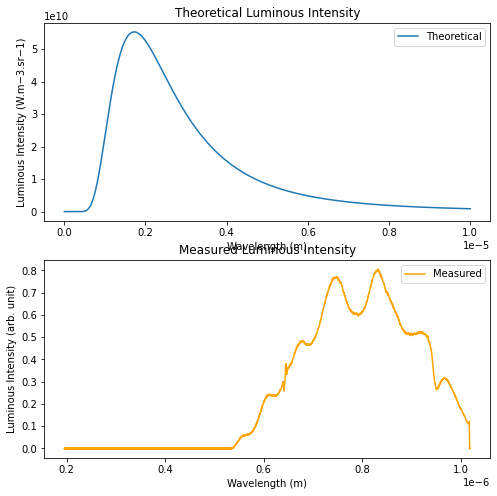

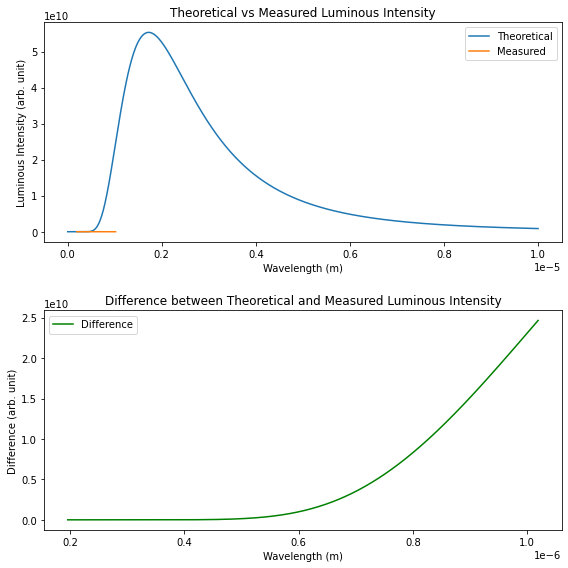

      wavelength (nm)  measure 1  measure 2  measure 3  \
0          195.637939   0.000617  -0.000008  -0.000130   
1          195.838028  -0.000202  -0.000483   0.000313   
2          196.038132   0.001108   0.000647   0.000542   
3          196.238266  -0.000415  -0.000483  -0.000703   
4          196.438415   0.001845   0.001564   0.000296   
...               ...        ...        ...        ...   
3643      1017.944946   0.003090   0.002023   0.001312   
3644      1018.188232  -0.000136  -0.000483  -0.000932   
3645      1018.431580   0.000650   0.000106   0.000165   
3646      1018.674866  -0.000300  -0.000401  -0.000375   
3647      1018.918213   0.000928   0.001122   0.000001   

      average luminous intensity (arb. unit)  wavelength (m)  \
0                                   0.000160    1.956379e-07   
1                                  -0.000124    1.958380e-07   
2                                   0.000766    1.960381e-07   
3                                  -0.000534   

In [258]:
# Compute theoretical luminous intensity using Planck's law
df['theoretical luminous intensity (W.m−3.sr−1)'] = (2 * h * c**2) / (df['wavelength (m)']**5 * (np.exp((h * c) / (df['wavelength (m)'] * kB * T)) - 1))

# Compute the difference between theoretical and measured luminous intensity
df['difference'] = df['theoretical luminous intensity (W.m−3.sr−1)'] - df['average luminous intensity (arb. unit)']

# Add a sample of wavelengths
sample_wavelengths = np.linspace(lambda_min, lambda_max, num=nb_lambdas)
sample_theoretical_luminous_intensity = (2 * h * c**2) / (sample_wavelengths**5 * (np.exp((h * c) / (sample_wavelengths * kB * T)) - 1))

# Create the first window with separate graphs for theoretical and measured intensity
fig1, axs1 = plt.subplots(2, 1, figsize=(8, 8))

# Plot the theoretical luminous intensity
axs1[0].plot(sample_wavelengths, sample_theoretical_luminous_intensity, label='Theoretical')
axs1[0].set_xlabel('Wavelength (m)')
axs1[0].set_ylabel('Luminous Intensity (W.m−3.sr−1)')
axs1[0].set_title('Theoretical Luminous Intensity')
axs1[0].legend()

# Plot the measured luminous intensity
axs1[1].plot(df['wavelength (m)'], df['average luminous intensity (arb. unit)'], label='Measured', color='orange')
axs1[1].set_xlabel('Wavelength (m)')
axs1[1].set_ylabel('Luminous Intensity (arb. unit)')
axs1[1].set_title('Measured Luminous Intensity')
axs1[1].legend()

# Create the second window with one plot for both theoretical and measured intensity, and one plot for the difference
fig2, axs2 = plt.subplots(2, 1, figsize=(8, 8))

# Plot both theoretical and measured luminous intensity on the same graph
axs2[0].plot(sample_wavelengths, sample_theoretical_luminous_intensity, label='Theoretical')
axs2[0].plot(df['wavelength (m)'], df['average luminous intensity (arb. unit)'], label='Measured')
axs2[0].set_xlabel('Wavelength (m)')
axs2[0].set_ylabel('Luminous Intensity (arb. unit)')
axs2[0].set_title('Theoretical vs Measured Luminous Intensity')
axs2[0].legend()

# Plot the difference between theoretical and measured luminous intensity
axs2[1].plot(df['wavelength (m)'], df['difference'], label='Difference', color='green')
axs2[1].set_xlabel('Wavelength (m)')
axs2[1].set_ylabel('Difference (arb. unit)')
axs2[1].set_title('Difference between Theoretical and Measured Luminous Intensity')
axs2[1].legend()

# Adjust the spacing between subplots in both windows
plt.tight_layout()

# Show both plots
plt.show()

# Print the DataFrame
print(df)

# Rappel : on a 3 jeux de données pour chaque truc, on peut peut-être moyenner
# Peut-être justement en montrant plot de 701 dire : ouais c'est pas ouf pour fit, ça rend mieux plus tard.

# Faire spectre de Planck mais seulement sur le domaine qu'on mesure limité
#  Peut etre aussi faire du relatif et borner à 1 la mesure
# Mais ce sera juste un facteur multiplicatif, pas d'offset
# et oui la descente c'est que ça mesure mal dans l'infrarouge

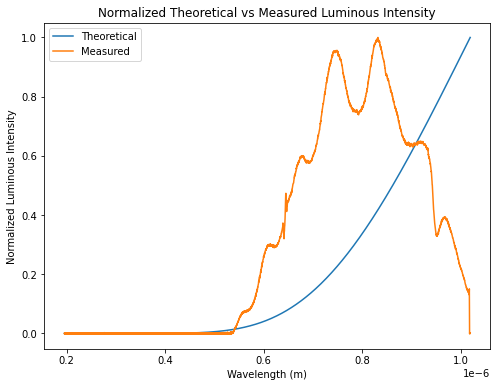

In [259]:
# Initialize lambda_min and lambda_max
lambda_min = df['wavelength (m)'].min()
lambda_max = df['wavelength (m)'].max()

# Compute theoretical luminous intensity using Planck's law for wavelengths between lambda_min and lambda_max
sample_wavelengths = np.linspace(lambda_min, lambda_max, num=nb_lambdas)
sample_theoretical_luminous_intensity = (2 * h * c**2) / (sample_wavelengths**5 * (np.exp((h * c) / (sample_wavelengths * kB * T)) - 1))

# Normalize the theoretical and measured luminous intensities
normalized_theoretical_luminous_intensity = sample_theoretical_luminous_intensity / sample_theoretical_luminous_intensity.max()
normalized_measured_luminous_intensity = df['average luminous intensity (arb. unit)'] / df['average luminous intensity (arb. unit)'].max()

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the normalized theoretical luminous intensity
ax.plot(sample_wavelengths, normalized_theoretical_luminous_intensity, label='Theoretical')

# Plot the normalized measured luminous intensity
ax.plot(df['wavelength (m)'], normalized_measured_luminous_intensity, label='Measured')

# Set the labels and title
ax.set_xlabel('Wavelength (m)')
ax.set_ylabel('Normalized Luminous Intensity')
ax.set_title('Normalized Theoretical vs Measured Luminous Intensity')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# On utilise ce graphe pour voir qu'en vrai, mesure est pauvre au delà du visible.

0       1.956379e-07
1       1.958380e-07
2       1.960381e-07
3       1.962383e-07
4       1.964384e-07
            ...     
3643    1.017945e-06
3644    1.018188e-06
3645    1.018432e-06
3646    1.018675e-06
3647    1.018918e-06
Name: wavelength (m), Length: 3648, dtype: float64
0       4.393240e-02
1       4.570386e-02
2       4.754281e-02
3       4.945182e-02
4       5.143324e-02
            ...     
3643    2.457236e+10
3644    2.459232e+10
3645    2.461229e+10
3646    2.463225e+10
3647    2.465222e+10
Name: wavelength (m), Length: 3648, dtype: float64
0       0.000160
1      -0.000124
2       0.000766
3      -0.000534
4       0.001235
          ...   
3643    0.002141
3644   -0.000517
3645    0.000307
3646   -0.000359
3647    0.000684
Name: average luminous intensity (arb. unit), Length: 3648, dtype: float64
The optimal scaling factor is 300.9999999999999


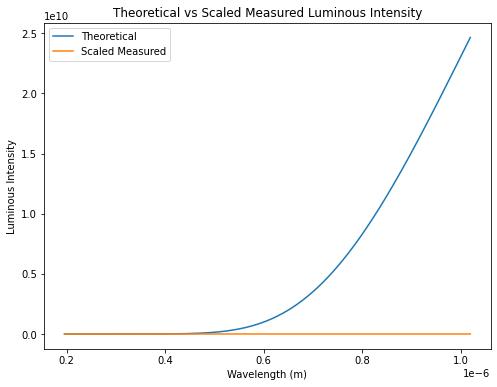

In [260]:
# Define the scaling function
def scaling_func(x, scale):
    return scale * x

# Compute theoretical luminous intensity using Planck's law for wavelengths between lambda_min and lambda_max
theoretical_luminous_intensity = (2 * h * c**2) / (df['wavelength (m)']**5 * (np.exp((h * c) / (df['wavelength (m)'] * kB * T)) - 1))

print(df['wavelength (m)'])
print(theoretical_luminous_intensity)
print(df['average luminous intensity (arb. unit)'])

# Fit the scaling function to the data
popt, _ = curve_fit(scaling_func, df['average luminous intensity (arb. unit)'], theoretical_luminous_intensity)

# The optimal scaling factor is the first element of popt
optimal_scale = popt[0]

print(f'The optimal scaling factor is {optimal_scale}')

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the theoretical luminous intensity
ax.plot(df['wavelength (m)'], theoretical_luminous_intensity, label='Theoretical')

# Plot the scaled measured luminous intensity
ax.plot(df['wavelength (m)'], optimal_scale * df['average luminous intensity (arb. unit)'], label='Scaled Measured')

# Set the labels and title
ax.set_xlabel('Wavelength (m)')
ax.set_ylabel('Luminous Intensity')
ax.set_title('Theoretical vs Scaled Measured Luminous Intensity')

# Show the legend
ax.legend()

# Show the plot
plt.show()


The optimal scaling factor is 7324201814.158365


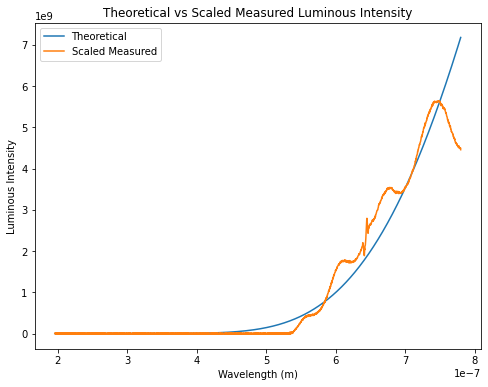

In [261]:
# Filter the DataFrame to only include rows where 'wavelength (m)' is less than 780 nm (visible)
df_filtered = df[df['wavelength (m)'] < 780e-9]

# Compute theoretical luminous intensity using Planck's law for wavelengths between lambda_min and lambda_max
theoretical_luminous_intensity_filtered = (2 * h * c**2) / (df_filtered['wavelength (m)']**5 * (np.exp((h * c) / (df_filtered['wavelength (m)'] * kB * T)) - 1))

# Fit the scaling function to the data
popt, _ = curve_fit(scaling_func, df_filtered['average luminous intensity (arb. unit)'], theoretical_luminous_intensity_filtered)

# The optimal scaling factor is the first element of popt
optimal_scale = popt[0]

print(f'The optimal scaling factor is {optimal_scale}')

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the theoretical luminous intensity
ax.plot(df_filtered['wavelength (m)'], theoretical_luminous_intensity_filtered, label='Theoretical')

# Plot the scaled measured luminous intensity
ax.plot(df_filtered['wavelength (m)'], optimal_scale * df_filtered['average luminous intensity (arb. unit)'], label='Scaled Measured')

# Set the labels and title
ax.set_xlabel('Wavelength (m)')
ax.set_ylabel('Luminous Intensity')
ax.set_title('Theoretical vs Scaled Measured Luminous Intensity')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [262]:
import os

# Specify the directory
directory = 'data/Mesures8210mA_AngleSolide'

# Use the listdir method from the os module to get the names of all files in the directory
file_names = os.listdir(directory)

# Print the file names
for file_name in file_names:
    print(file_name)

Position0-62mm+25mm_0angle.txt
Position0-62mm+5cm_0angle.txt
Position0-62mm-0angle.txt
Position0-62mm-decalage-cote35mm.txt


Index(['wavelength (nm)', 'luminous intensity (arb. unit)'], dtype='object')
Index(['wavelength (nm)', 'luminous intensity (arb. unit)'], dtype='object')
Index(['wavelength (nm)', 'luminous intensity (arb. unit)'], dtype='object')
Index(['wavelength (nm)', 'luminous intensity (arb. unit)'], dtype='object')
Index(['wavelength (nm)', 'luminous intensity (arb. unit)', 'wavelength (m)'], dtype='object')


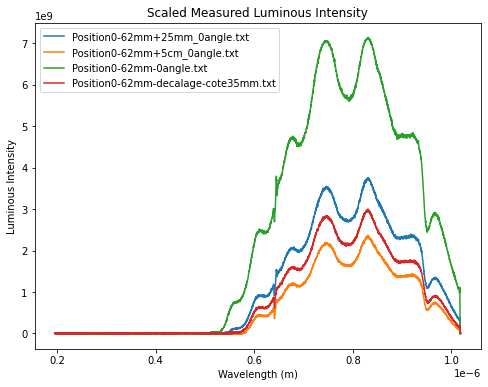

In [263]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Create a new figure
fig, ax = plt.subplots(figsize=(8, 6))

# Specify the directory
directory = 'data/Mesures8210mA_AngleSolide'

# Use the listdir method from the os module to get the names of all files in the directory
file_names = os.listdir(directory)

# Iterate over the file names
for file_name in file_names:
    # Load the data from the file into a DataFrame
    df_all = pd.read_csv(os.path.join(directory, file_name), sep=';', header=None)

    # Rename the first column to 'wavelength (nm)'
    df_all.rename(columns={0: 'wavelength (nm)'}, inplace=True)
    df_all.rename(columns={1: 'luminous intensity (arb. unit)'}, inplace=True)

    print(df_all.columns)

    # Create a new column 'wavelength (m)' by converting 'wavelength (nm)' from nanometers to meters
    df_all['wavelength (m)'] = df_all['wavelength (nm)'] * 1e-9

    # Scale the measured luminous intensity by the optimal scaling factor
    #df_all['luminous intensity (arb. unit)'] = pd.to_numeric(df_all['average luminous intensity (arb. unit)'], errors='coerce')
    df_all['luminous intensity (arb. unit)'] = df_all['luminous intensity (arb. unit)'] * optimal_scale

    # Plot the scaled measured luminous intensity
    ax.plot(df_all['wavelength (m)'], df_all['luminous intensity (arb. unit)'], label=file_name)

print(df_all.columns)
# Set the labels and title
ax.set_xlabel('Wavelength (m)')
ax.set_ylabel('Luminous Intensity')
ax.set_title('Scaled Measured Luminous Intensity')

# Show the legend
ax.legend()

# Show the plot
plt.show()

# C'est cool là on montre que c'est anisotrope